<a href="https://colab.research.google.com/github/LorenaMendesB/Resumo-Expandido-Aprendizagem-de-M-quina/blob/main/Grupo_1_mlp_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <p align = center>  **Aprendizagem de Máquina - Inteligência Artificial** <p  align = left>  
## <p align = center>  **MACHINE LEARNING APLICADA NA ANÁLISE DE POSSÍVEIS CASOS DE ATAQUE CARDÍACO** <p  align = left>  

<p align = center>  Alunos </p>

---

 <p> <b>Nome:</b> Gustavo da Silva Dias. </p>
<p> <b>Nome:</b> João Paulo da Silva Barros. </p>
<p> <b>Nome:</b> Lorena Mendes Barbosa. </p>
<p> <b>Nome:</b> Osvaldo Bispo de Andrade Neto. </p>

--- 


# **Multilayer Perceptron**
>As redes neurais artificiais (RNAs) são sistemas computacionais compostos por vários elementos (neurônios) que se interrelacionam de forma conexa, inspirados no funcionamento de neurônios biológicos. Dentre as arquiteturas mais populares de RNAs, destacam-se as redes Multilayer Perceptron (MLP), as quais são aplicadas com sucesso em uma grande variedade de problemas de processamento de informação, incluindo classificação, aproximação de funções e previsão de séries temporais.

>O presente notebook colab, escrito por Alison Zille Lopes, pretende introduzir o uso de redes MLP em problemas de classificação. A codificação foi inteiramente baseada em {1}, logo, emprega a biblioteca de aprendizagem de máquina scikit learn {2}.

---

{1} KRISTIAN, Y. Machine Learning in 30 minutes with Python and Google Colab. 2019. Disponível em: https://medium.com/@yosik81/machine-learning-in-30-minutes-with-python-and-google-colab-6e6dfb77f5e1. Acesso em: 2 jan 2021.

{2} SCIKIT-LEARN. scikit-learn: Machine Learning in Python. Disponível em: https://scikit-learn.org/stable/index.html. Acesso em: 2 jan 2021.


# **Base de Dados**
>Entrada da base de dados por intermédio da seleção de um arquivo csv. A abertura é realizada através de uma janela externa, a qual gera uma tabela com os dados. A primeira linha da tabela, geralmente, será composta pelos rótulos das colunas.

>* O teste do presente notebook foi realizado através da base de dados sobre espécies de flores do gênero Iris {3}. A base de dados contém 150 amostras, sendo cada uma formada por 5 atributos (4 características e 1 classe).
---
{3} Fisher, R. A. Iris Species Dataset. 1936. Disponível em: https://www.kaggle.com/uciml/iris. Acesso em: 4 jan 2021.

In [ ]:
# [1] Entrada da Base de Dados
from google.colab import files
import pandas as pd
import io
uploaded = files.upload() # uploaded é um dicionário, sendo a chave o nome do arquivo

#list(uploaded.keys())[0] foi a forma que encontrei de não entrar com o nome do arquivo no código
table = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

Saving heart.csv to heart.csv


# **Preparação dos Conjuntos**
>Os trechos de código a seguir servem para separar os conjuntos de treinamento e teste, devendo ser selecionada um das versões.
* [2.1] separa, aleatoriamente, 75 % dos dados para treinamento (train) e 25 % para teste (test).
* [2.2] irá, para cada classe, colocar 75 % dos dados no treinamento (train) e os 25 % restantes no conjunto de teste (test)

In [ ]:
#[2.1] Formação dos conjuntos de treinamento e teste
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = np.array(table)

#data = data[:, 1:] # remover essa linha caso a primeira coluna corresponda a dados relevantes REMOVIDA!

# Indentificando os rótulos das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

scaler = StandardScaler()

y = np.array(pd.get_dummies(data[:, data.shape[1]-1])).astype(np.float32)
x = (data[:, :(data.shape[1]-1)]).astype(np.float32)

scaler.fit(x) # ajuste do scaler para pré-processamento

# Gerando os conjuntos de treinamento e teste (validação)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25) # 0.25 dos dados no conjunto de teste

print('Conjuntos de treinamento e teste separados!')

In [ ]:
#[2.2] Formação dos conjuntos de treinamento e teste
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = np.array(table)

#data = data[:, 1:] # remover essa linha caso a primeira coluna corresponda a dados relevantes

scaler = StandardScaler()
scaler.fit(data[:, :(data.shape[1]-1)]) # ajuste do scaler para pré-processamento

# Indentificando os rótulos das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

# Contando o número de dados (amostras) em cada classe
num_labels = [] # lista com número de amostras por classe
ctrl = [] # lista usada na separação entre treinamento e teste
for label in labels:
  count = 0
  for line in range(data.shape[0]):
    if(label == data[line, data.shape[1]-1]):
      count = count + 1
  num_labels.append(count)
  ctrl.append(0)

# num_labels passa a conter o número de elementos por classe no conjunto de treinamento
train_p = 0.75 # percentual dos dados na lista de treinamento
for i in range(len(num_labels)):
  num_labels[i] = round(num_labels[i] * train_p)

train = int(0) # atribuir 0 seria suficiente, mas resolvi garantir
test = int(0)

# separação dos conjuntos de treinamento (train) e teste (test)
for line in range(data.shape[0]):
  for label in labels:
    if(label == data[line, data.shape[1]-1]):      
      aux = labels.index(label) 
      
      if (ctrl[aux] < num_labels[aux]):
        if (type(train) is int):
          train = data[line, :]
        else:
          train = np.row_stack((train, data[line, :]))      
      else:
        if (type(test) is int):
          test = data[line, :]
        else:
          test = np.row_stack((test, data[line, :]))
      ctrl[aux] = ctrl[aux]+1
      break

train_x = (train[:, :train.shape[1]-1]).astype(np.float32) # entradas de train
train_y = np.array(pd.get_dummies(train[:, train.shape[1]-1])).astype(np.float32)  # saídas (classes) de train
test_x = (test[:, :test.shape[1]-1]).astype(np.float32) # entradas de test
test_y = np.array(pd.get_dummies(test[:, test.shape[1]-1])).astype(np.float32) # saídas (classes) de test

print('Conjuntos de treinamento e teste separados!')

Conjuntos de treinamento e teste separados!


# **Multilayer Perceptron:** topologia e treinamento
>A topologia é a estrutura da rede neural artificial. A topologia de uma rede MLP pode ser organizada em: camada de entrada, camadas ocultas e camada de saída. O número de entradas e de neurônios na saída depende do problema, entretanto, o número de camadas ocultas e de neurônios em cada uma dessas camadas é uma questão de projeto. Assim, podemos testar diferentes topologias, variando o número de camadas ocultas e de neurônios nas mesmas, para um mesmo problema.

>No código a seguir, o número de camadas ocultas, bem como o número de neurônios em cada uma dessas camadas, pode ser informado via "terminal". Além disso, o número máximo de épocas de treinamento também será informado de forma similar. Entretanto, os demais parâmetros necessários ao treinamento foram fixados e devem ser alterados diretamente no código.
*   Caso seja necessário realizar alterações, veja a documentação do MLPClassifier em {4}.

---
{4} SCIKIT-LEARN. sklearn.neural_network.MLPClassifier. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html. Acesso em: 2 jan 2021




Sugestão do ponto de partida descritas na aula 35.
Total de neuronios nas camadas ocultas = >= (Numero de entradas + numero saidas)/2 (O professor prefere usar uma camada oculta)
Total de neuronios nas camadas ocultas = <= (2 * numero saidas)
Total de neuronios nas camadas ocultas = numero saidas (o professor prefere esse)
<br> máximo de epocas: numero maximo de iterações do algoritmo de treinamento.não leva em consideração o estado do processo.

Ajustando a topologia...
Entradas = 13
Saídas = 2
Número de camadas ocultas: 1
Neurônios na camada oculta: 20


Treinamento...
Número de épocas de treinamento: 3000
MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=3000, random_state=121,
              solver='sgd', verbose=0)
Topologia da MLP = [13, 20, 2]


Text(0, 0.5, 'perda')

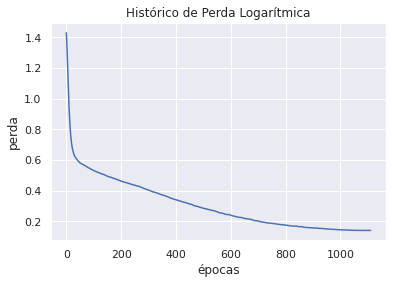

In [ ]:
3# [3] MLP: topologia e treinamento
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

print('Ajustando a topologia...')
num_x = train_x.shape[1]
num_y = train_y.shape[1]
print('Entradas = %i\nSaídas = %i' % (num_x, num_y))

while(True):
  num_hidden_layers = int(input('Número de camadas ocultas: '))
  if(num_hidden_layers>0):
    break

if(num_hidden_layers==1):
  while(True):
    topology = [int(input('Neurônios na camada oculta: '))]
    if(topology[0]>0):
      break
else:
  topology = []
  for i in range(num_hidden_layers):
    while(True):
      num = int(input('Neurônios na %iª camada oculta: ' % (i+1)))
      if(num>0):
        topology.append(num)
        break

print('\n\nTreinamento...')

epochs = int(input('Número de épocas de treinamento: '))

# inicialização do modelo
Model = MLPClassifier(hidden_layer_sizes=tuple(topology), max_iter=epochs, alpha=0.1,
                     solver='sgd', learning_rate_init=0.01, momentum=0.9, learning_rate='adaptive', verbose=0,  random_state=121) # verbose=1 exibe o log de treinamento

topology.insert(0, num_x)
topology.append(num_y)

# pré-processamento
p_train_x = scaler.transform(train_x)

# treinando o modelo
model = Model.fit(p_train_x, train_y)

print(model)
print('Topologia da MLP =', topology)

# exibindo a curva de perda logarítmica
plt.plot(model.loss_curve_)
plt.title('Histórico de Perda Logarítmica')
plt.xlabel('épocas')
plt.ylabel('perda')

# **Análise:** Conjunto de Treinamento
>O código a seguir serve para exibir o relatório de classificação, acurácia e matriz de confusão para o conjunto de treinamento.

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.99      1.00      1.00       124

   micro avg       1.00      1.00      1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228
 samples avg       1.00      1.00      1.00       228

A acurácia é  0.9956140350877193


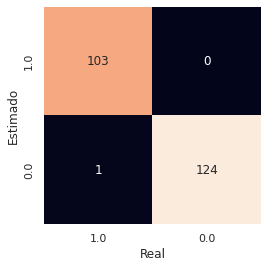

In [ ]:
# [4] Análise do conjunto de treinamento
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

train_est_y = model.predict(p_train_x)

# matriz de confusão
mat = confusion_matrix(train_y.argmax(axis=1), train_est_y.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(train_y, train_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(train_est_y, train_y)) # exibe acurácia




# **Análise:** Conjunto de Teste
>O código a seguir serve para exibir o relatório de classificação, acurácia e matriz de confusão para o conjunto de teste.

              precision    recall  f1-score   support

           0       0.85      0.65      0.73        34
           1       0.75      0.93      0.83        41

   micro avg       0.78      0.80      0.79        75
   macro avg       0.80      0.79      0.78        75
weighted avg       0.79      0.80      0.78        75
 samples avg       0.79      0.80      0.79        75

A acurácia é  0.7733333333333333


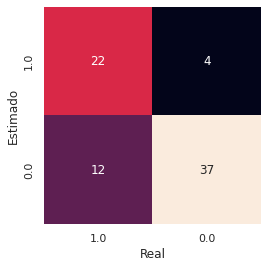

In [ ]:
# [5] Análise do conjunto de teste
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# pré-processamento
p_test_x = scaler.transform(test_x)

test_est_y = model.predict(p_test_x)

# matriz de confusão
mat = confusion_matrix(test_y.argmax(axis=1), test_est_y.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(test_y, test_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(test_est_y, test_y)) # exibe acurácia
